In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
data = pd.read_csv('/home/student/Desktop/enam/data_preprocessing/3_final_descriptors.csv')

In [21]:
data

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,gap
0,-1.678373,0.621798,0.194803,-0.108655,-0.431465,-0.548310,-0.188259,0.467344,0.805793,0.521714,...,-0.145778,0.136180,0.149363,0.164955,-0.016354,-0.087396,-0.223456,-0.053401,-0.154213,0.3049
1,2.413777,-0.958577,-0.133933,1.138349,0.149927,0.444823,0.615890,-0.403380,0.622096,0.674860,...,0.254439,-0.197821,0.313852,0.333831,-0.260601,0.096819,0.107580,-0.060317,-0.168268,0.2454
2,-0.689326,-1.815552,0.366853,-0.893817,-1.023382,-0.887666,-1.467653,0.393151,-0.485834,0.648487,...,-0.076939,-0.304443,0.052689,-0.144657,-0.319800,-0.430828,0.393157,0.162784,-0.047986,0.3155
3,-0.657622,0.078718,0.268385,1.087692,-0.315219,0.852714,1.265713,1.010074,-1.600703,-0.044025,...,0.024200,-0.118433,0.043224,-0.158826,0.009597,0.095494,-0.332864,0.121158,0.010691,0.2787
4,-1.840158,0.408121,-0.076951,-0.399845,-0.861435,-0.115383,0.278299,-1.216077,-0.490411,-1.142720,...,-0.101025,0.227344,-0.051856,0.146840,0.038437,0.148012,-0.029966,0.145328,-0.173955,0.3009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.380196,0.932830,0.502603,-0.662665,-1.060167,-0.449531,0.255051,0.651034,0.548531,0.585654,...,-0.326707,-0.021937,0.034166,0.141747,0.075824,0.089052,0.024184,0.054577,-0.123785,0.2568
19996,-2.151819,-0.609588,1.444002,-1.039171,-0.131531,0.484563,0.085359,-0.926206,1.124491,-0.017621,...,0.038963,0.252780,0.134570,0.110769,0.020542,-0.083541,-0.127238,0.071983,0.018793,0.2883
19997,0.878514,-0.808301,-0.739619,-0.396917,-0.648273,0.983900,-0.117932,0.154785,1.307304,0.186188,...,-0.210488,-0.133836,-0.143687,-0.102174,0.142018,0.173342,-0.007651,-0.107551,0.138938,0.2517
19998,-1.047566,0.776880,-0.504467,-0.048459,0.267996,-0.437728,-0.543049,0.203558,0.913371,-0.550616,...,-0.025281,-0.075873,-0.223693,0.013592,-0.002673,-0.056313,0.024907,0.024398,0.022180,0.2768


In [22]:
# Проверка целевой колонки
gap_column = data.iloc[:, -1]

# Минимальное значение
min_value = gap_column.min()

# Максимальное значение
max_value = gap_column.max()

# Среднее значение
mean_value = gap_column.mean()

# Наиболее часто встречающееся значение
mode_value = gap_column.mode()[0]

# Квартили
quartiles = gap_column.quantile([0.25, 0.5, 0.75])

# Дисперсия
variance = gap_column.var()

# Вывод результатов
print("Минимальное значение:", min_value)
print("Максимальное значение:", max_value)
print("Среднее значение:", mean_value)
print("Наиболее часто встречающееся значение:", mode_value)
print("Дисперсия:", variance)
print("Квартили:")
print(quartiles)

Минимальное значение: 0.0376
Максимальное значение: 0.5048
Среднее значение: 0.251077175
Наиболее часто встречающееся значение: 0.2188
Дисперсия: 0.0022667153892888398
Квартили:
0.25    0.2165
0.50    0.2495
0.75    0.2879
Name: gap, dtype: float64


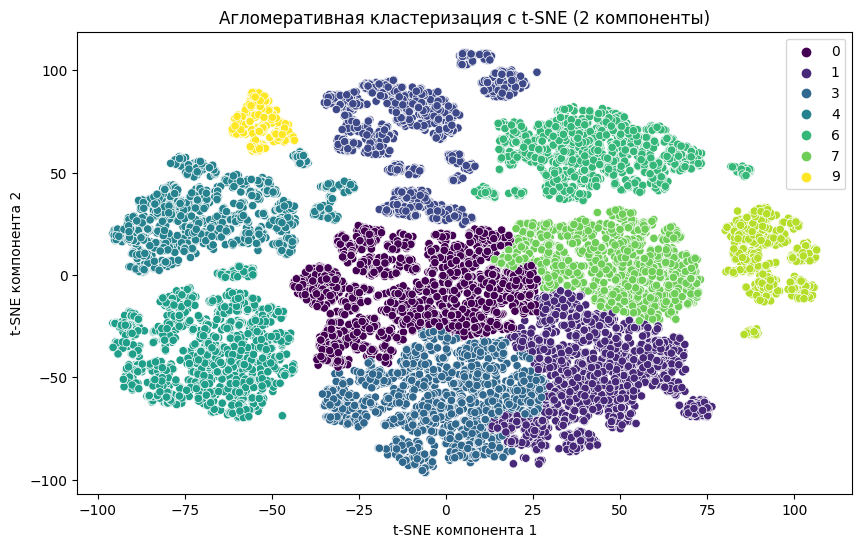

In [32]:
descriptors = pd.DataFrame()
descriptors = data.drop(columns=["gap"])

# Применяем t-SNE для снижения размерности с двумя компонентами
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(descriptors)

# Создаем экземпляр алгоритма кластеризации (агломеративный)
agglomerative = AgglomerativeClustering(n_clusters=10)
clusters = agglomerative.fit_predict(tsne_result)

# Визуализация результатов с помощью Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=clusters, palette='viridis')
plt.title('Агломеративная кластеризация с t-SNE (2 компоненты)')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

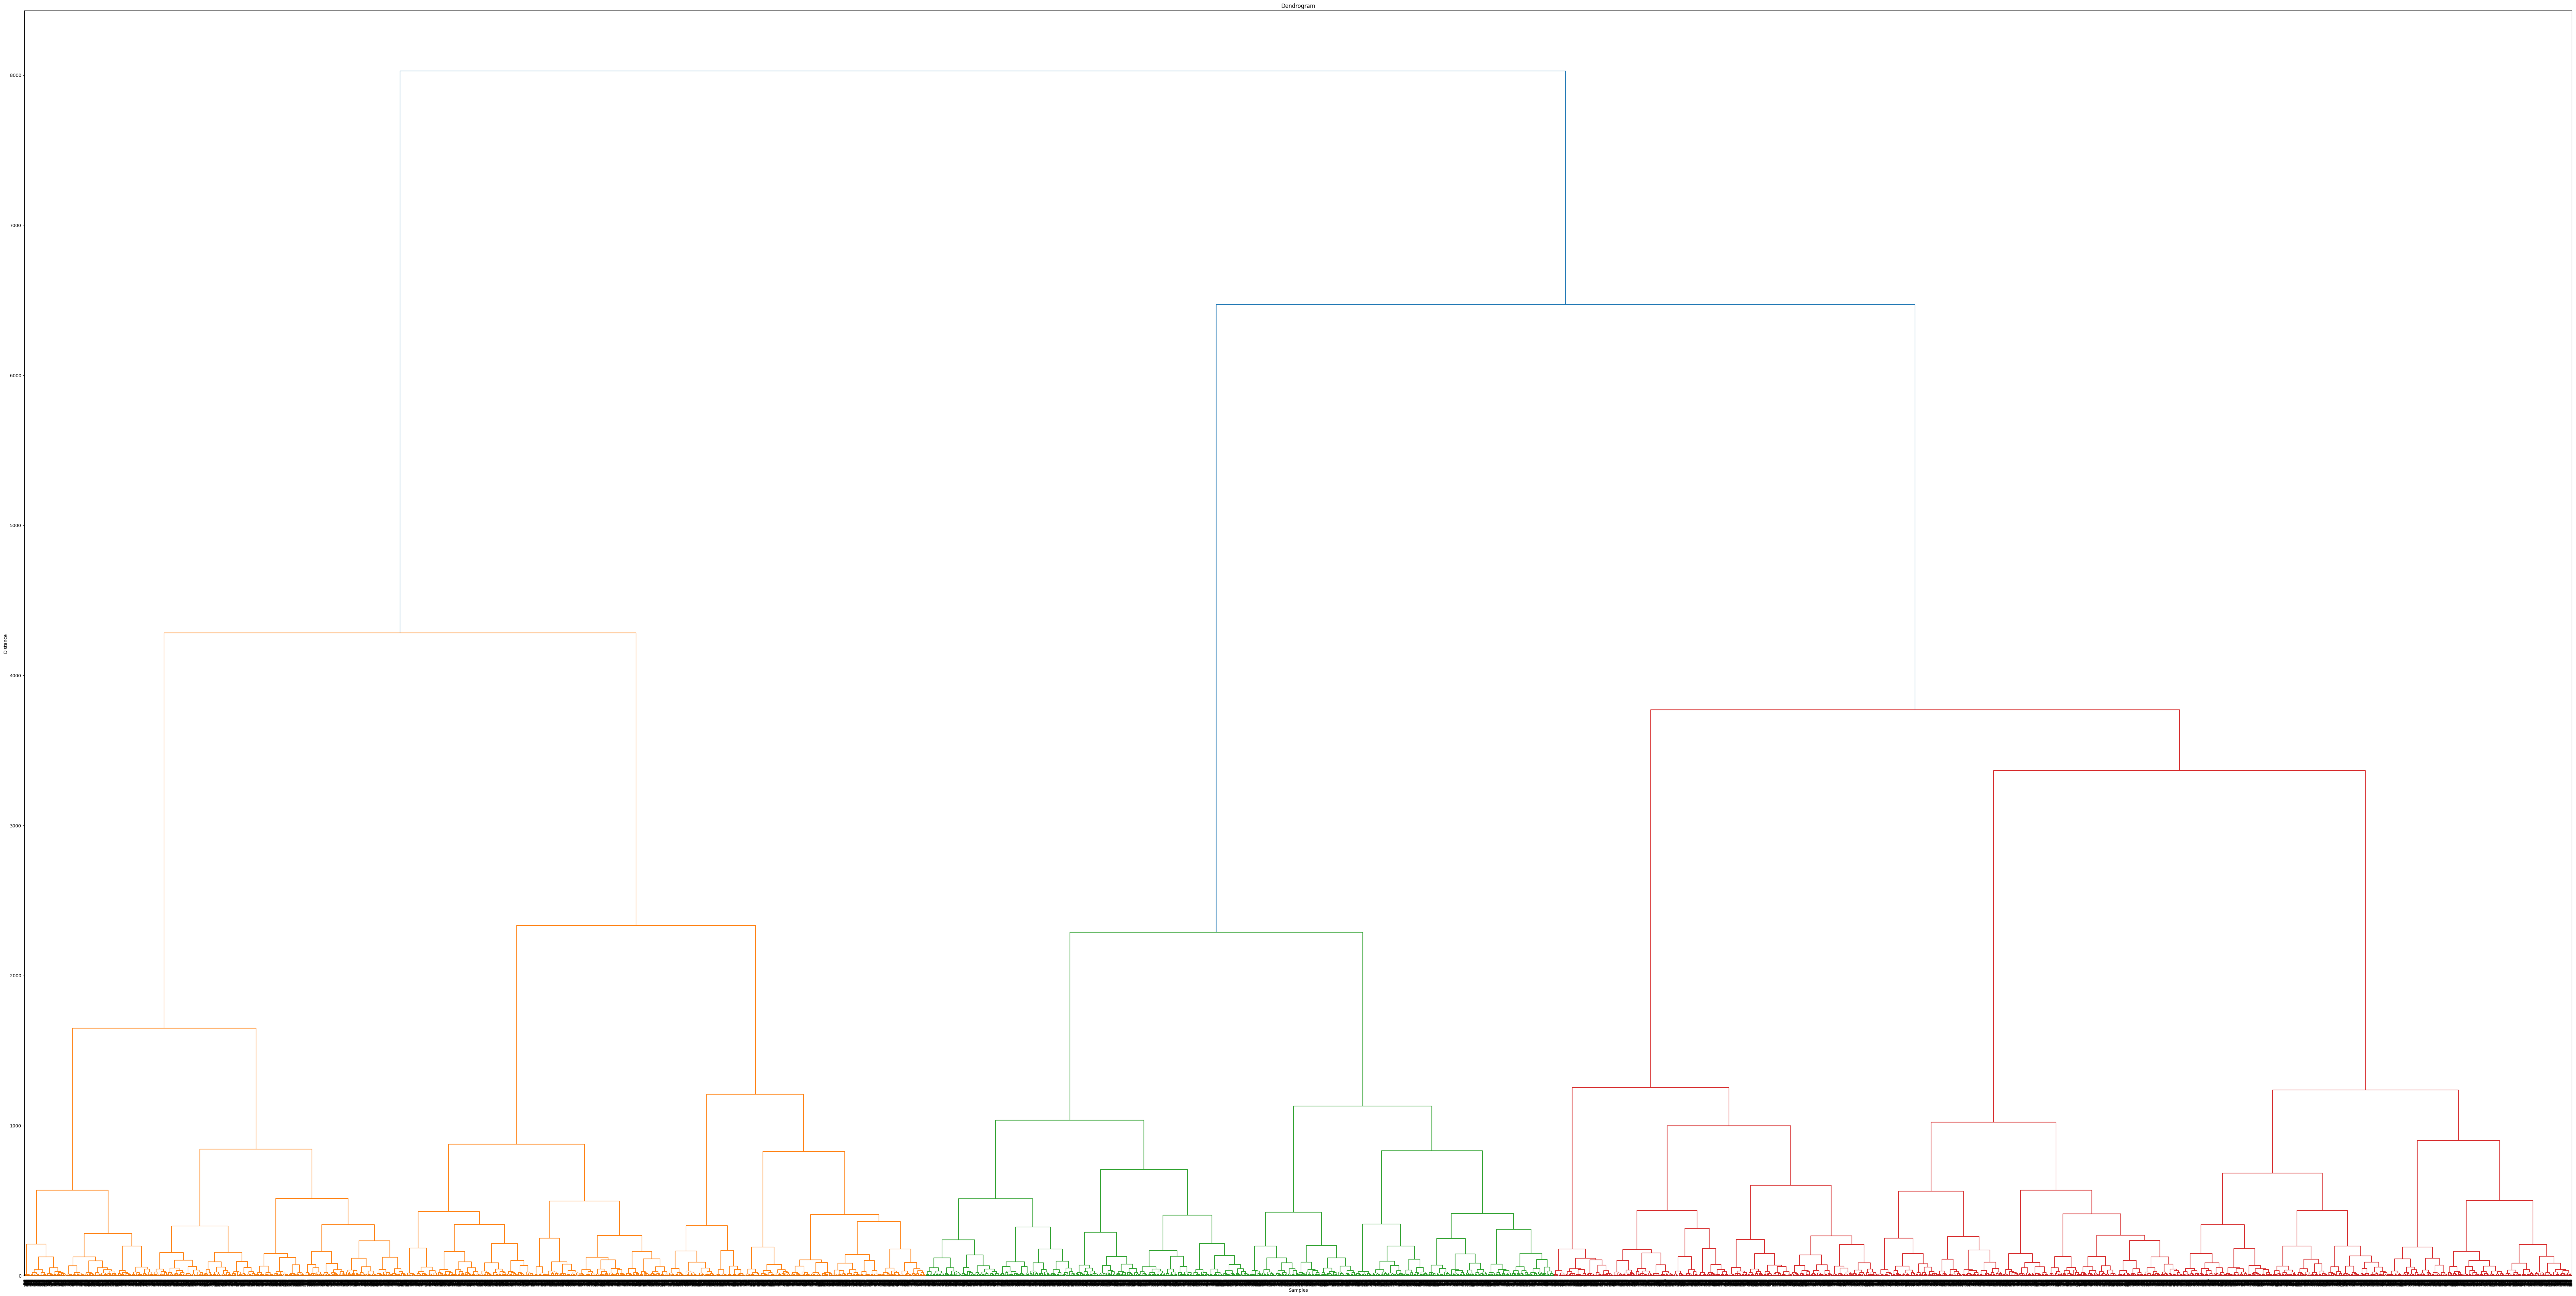

In [34]:
# Дендрограмма
# Выполнение агломеративной кластеризации
Z = linkage(tsne_result, method='ward')

# Визуализация дендрограммы
plt.figure(figsize=(100, 50))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

/home/student/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


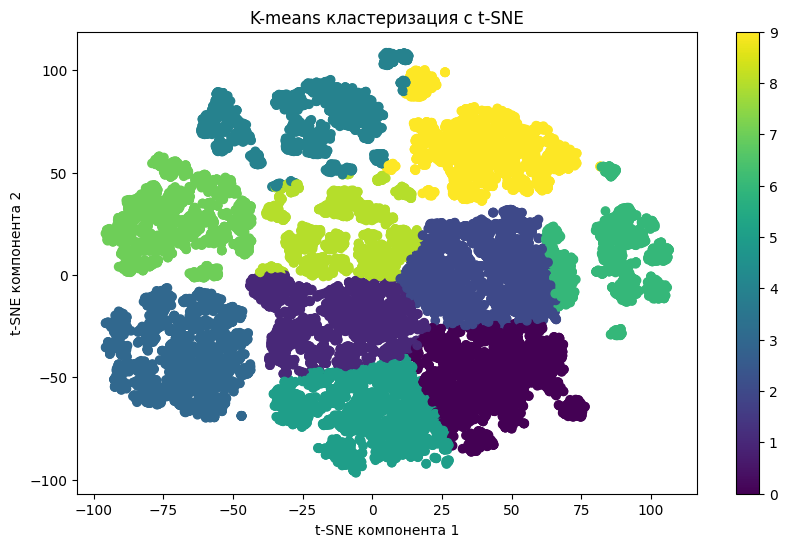

In [35]:
# Кластеризация с k-means
# Создаем экземпляр алгоритма кластеризации
kmeans = KMeans(n_clusters=10)

# Применяем кластеризацию к данным
kmeans.fit(tsne_result)
clusters = kmeans.labels_

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis')
plt.title('K-means кластеризация с t-SNE')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.colorbar()
plt.show()

In [ ]:
""" Проверка адекватности кластеризации"""

In [24]:
# Трансформация значений в последней колонке
first_quartile = quartiles.iloc[0]
second_quartile = quartiles.iloc[1]
gap_column_classes = gap_column.apply(lambda x: 0 if x < first_quartile else (1 if first_quartile < x < second_quartile else 2))

# Создание датафрейма для кластеризации
features = data.iloc[:, :-1]  # Все столбцы, кроме последнего

# Кластеризация с использованием метода KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features)

# Проверка качества кластеризации
target_variable = data.iloc[:, -1]

# Используем Adjusted Rand Index для оценки качества кластеризации
ari_score = adjusted_rand_score(target_variable, clusters)

# Вывод результата
print("Adjusted Rand Index для кластеризации:", ari_score)

/home/student/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index для кластеризации: 0.0002563477481043986


/home/student/.local/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/home/student/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


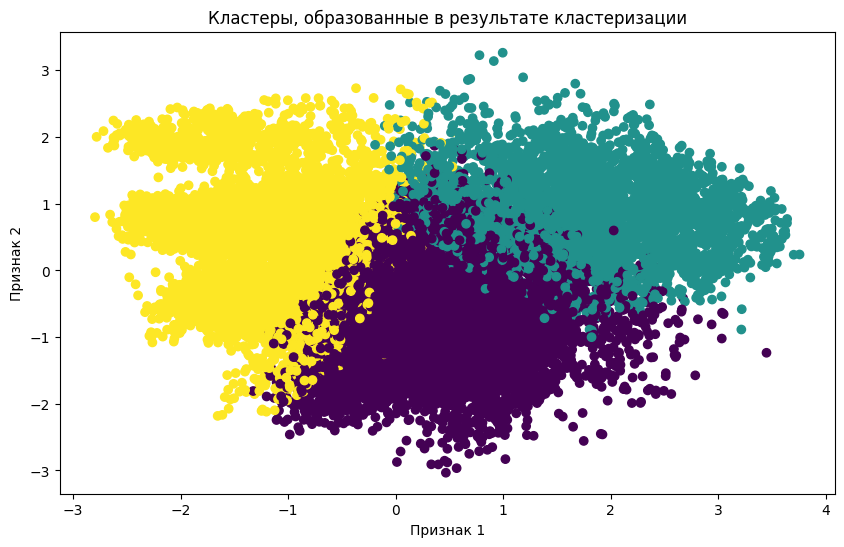

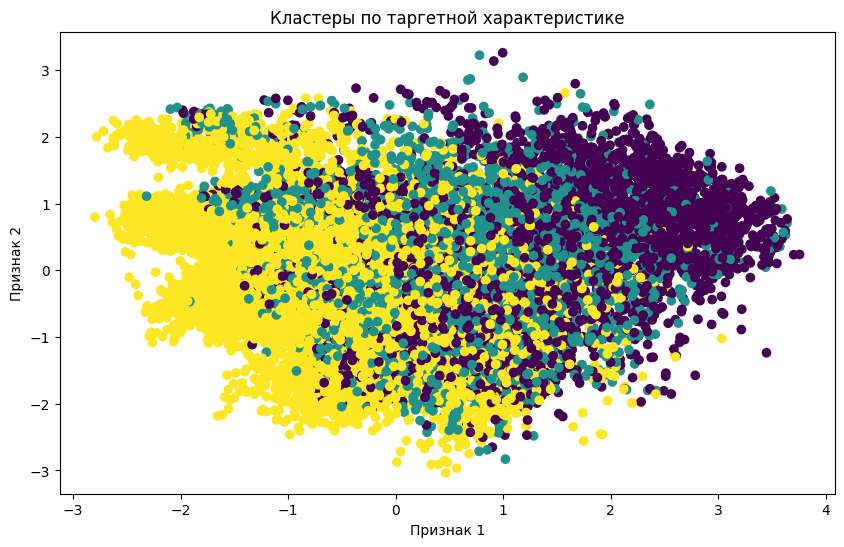

In [29]:
# Пример данных
X = data.drop(columns=['gap'])  
y = gap_column_classes 

# Кластеризация с помощью KMeans на 3 кластера
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# График кластеров, образованных в результате работы алгоритма кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Кластеры, образованные в результате кластеризации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# График кластеров по таргетной характеристике (для сравнения)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.title('Кластеры по таргетной характеристике')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

In [ ]:
"""
Для искусственного создания кластеров я использовал разбиение целевой характеристики: меньше 1 квартиля, меньше 2 квартиля (но больше 1) и
больше 2 квартиля. Как можно заметить по визуализации и по метрике ARI (Adjusted Rand Index для кластеризации: 0.0002563477481043986) дескрипторы
совершенно не отражают подобные кластеры.

Если рассматривать агломеративную кластеризацию, можно достаточно хорошо увидеть разные группы точек данных, однако выделить какой-то
определенный паттерн я не смог.
Можно отметить, что разные алгоритмы кластеризации (агломеративная и k-means) дают очень похожие результаты.

Ниже приведены модели, решающие задачу регрессии, так как по результатам кластеризации мне показалось, что полученные в результате feature selection 
дескрипторы совершенно не отражают действительную картину данных.
Однако сразу могу сказать, что обе модели показывают неплохие результаты. Значит дескрипторы все же имеют значимость.

Возможно подобный результат обусловлен тем, что в среди дескрипторов отсутствует SMILES репрезентация или ее трансформированное 
представление (в фингерпринт, например). Возможно подобная информация о структуре соединений помогла бы лучше кластеризовать данные. Но не факт
"""

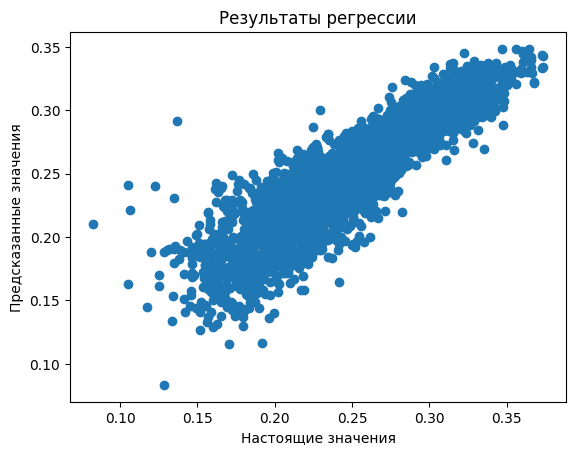

Метрики на тестовой выборке:
MSE: 0.00043524423445888194
RMSE: 0.02086250786599928
MAE: 0.016086945408972982
R2: 0.8098973027105438

Метрики при кросс-валидации:
Среднее MSE: 0.00043241318027093564
Среднее RMSE: 0.02079340733565477
Среднее MAE: 0.016116514048099724
Среднее R2: 0.8091687345760752


In [36]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Загрузка данных
X = data.drop(columns=["gap"])
y = data["gap"]

# Создание модели линейной регрессии
model = LinearRegression()

# Разделение данных на тренировочную и тестовую выборки с помощью кросс-валидации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

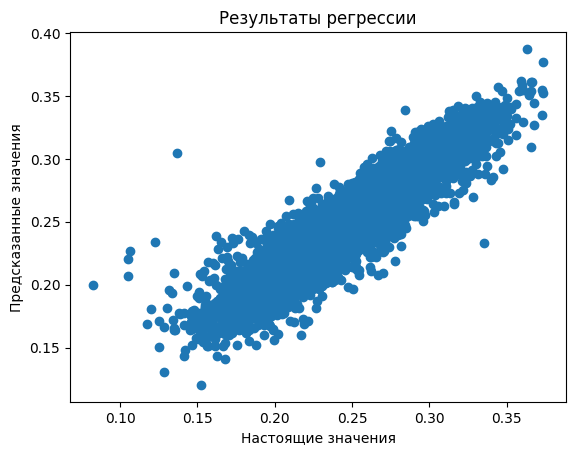

Метрики на тестовой выборке:
MSE: 0.0003189208864170988
RMSE: 0.01785835620702809
MAE: 0.013326073556995392
R2: 0.8607041382059655

Метрики при кросс-валидации:
Среднее MSE: 0.0003280554025684758
Среднее RMSE: 0.01811180078483967
Среднее MAE: 0.013634111271657942
Среднее R2: 0.8552387965814496


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Создание модели градиентного бустинга
model = XGBRegressor()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")